In [1]:
# notebook to illustrate text indexing and relevance scoring

In [1]:
# following only used for development, reloads the modules with any code changes
%load_ext autoreload
%autoreload 2

# inline matplotlib charts
%matplotlib inline

In [2]:
# import our text mining toolkit
import text_mining_toolkit as tmt

In [3]:
cr = tmt.corpus_reader.CorpusReader(content_directory="data_sets/recipes/txt/", text_filename_pattern="??.txt")
#cr = tmt.corpus_reader.CorpusReader(directory_of_files="data_sets/mystery_corpus_01/txt/", text_filename_pattern="??.txt")
#cr = tmt.corpus_reader.CorpusReader(content_directory="data_sets/iraq_inquiry/txt/", text_filename_pattern="the-report*.txt")
#cr = tmt.corpus_reader.CorpusReader(content_directory="data_sets/clinton_emails/txt/", text_filename_pattern="C0*.txt")
#cr = tmt.corpus_reader.CorpusReader(content_directory="data_sets/shakespeare_macbeth/txt/", text_filename_pattern="macbeth_act_0?_scene_0?.txt")

content_directory =  data_sets/recipes/txt/
text_filename_pattern =  ??.txt
self.documents populated =  22


In [6]:
# first clear wordcount and relevance indices
tmt.index_wordcount.delete_index(cr.content_directory)
tmt.index_relevance.delete_index(cr.content_directory)

# for all documents in corpus
for document_name in cr.get_documents():
    print("processing ", document_name)

    # get document text
    document_text = cr.get_text_by_document(document_name)

    # simplify whitespace (remove newlines)
    b = tmt.text_processing.simplify_whitespace(document_text)

    # only keep alphanumeric characters, removes punctuation
    c = tmt.text_processing.keep_only_alphanumeric(b)

    # make lowercase
    d = tmt.text_processing.to_lowercase(c)

    # split into words list
    dl = tmt.text_processing.split_text_into_words(d)
    
    # build n-grams
    #gl = tmt.word_processing.build_ngrams_from_words(dl,2)

    # remove stop words
    #el = tmt.word_processing.remove_stop_words(dl, "./stopwords/minimal-stop.txt")
    
    # update index
    tmt.index_wordcount.create_wordcount_index_for_document(cr.content_directory, document_name, dl)
    pass


removed wordcount index file:  data_sets/recipes/txt/index_wordcount.hdf5
removed relevance index file:  data_sets/recipes/txt/index_relevance.hdf5
processing  00.txt
processing  01.txt
processing  02.txt
processing  03.txt
processing  04.txt
processing  05.txt
processing  06.txt
processing  07.txt
processing  08.txt
processing  09.txt
processing  10.txt
processing  11.txt
processing  12.txt
processing  13.txt
processing  14.txt
processing  15.txt
processing  16.txt
processing  17.txt
processing  18.txt
processing  19.txt
processing  20.txt
processing  21.txt


In [7]:
# merge document indices into a corpus index
tmt.index_wordcount.merge_wordcount_indices_for_corpus(cr.content_directory)

saving corpus word count index ...  data_sets/recipes/txt/index_wordcount.hdf5


In [10]:
tmt.index_relevance.calculate_relevance_index(cr.content_directory)

saving corpus relevance index ...  data_sets/recipes/txt/index_relevance.hdf5


In [11]:
words_by_relevance = tmt.index_relevance.get_words_by_relevance(cr.content_directory)
# 20 most common
words_by_relevance[:20]

sauce       0.072480
them        0.070834
little      0.062832
rice        0.058276
butter      0.057279
bread       0.055933
they        0.054794
quantity    0.051914
together    0.050063
grated      0.048861
broth       0.048693
tomato      0.048444
boiled      0.047588
flour       0.047404
water       0.046393
then        0.046343
pepper      0.044368
some        0.044304
very        0.043971
that        0.043831
dtype: float64

In [12]:
# 20 least common
words_by_relevance[-20:]

heap    0.002419
than    0.002419
wet     0.002299
pie     0.002299
top     0.002299
your    0.002224
leaf    0.002224
32      0.002015
3       0.002004
2       0.002004
4       0.002004
1       0.002004
now     0.001799
bit     0.001799
had     0.001799
i       0.001282
up      0.001273
in      0.000000
and     0.000000
the     0.000000
dtype: float64

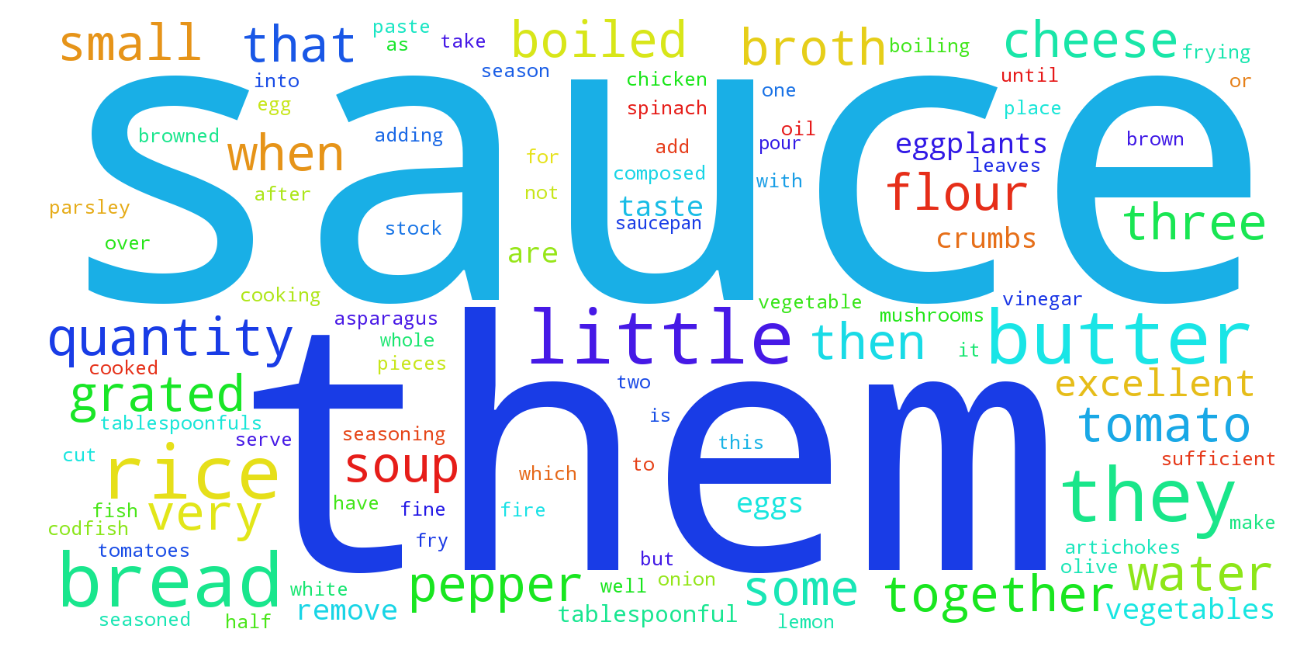

In [13]:
# visualise most relevance words
tmt.visualisation.plot_wordcloud(words_by_relevance)